# 신경망 모델 훈련

## 손실 곡선
- 사잇킷런 알고리즘 : 모델의 구조가 어느 정도 고정되어 있음
- 케라스 알고리즘 : 모델의 구조를 직접 만드는 느낌이 강함
- 모델의 코드셀은 print()명령을 사용하지 않더라도 마지막 라인 실행결과를 자동으로 출력
    - 즉 반환되는 결과가 있다는 의미
    - 케라스의 fit()메서드는 History 클래스 객체를 반환 함
- History 클래스 객체
    - 훈련과정에서 계산한 지표, 즉, 손실도 정확도 값이 저장되어 있음
    - 이 값을 사용하여 그래프를 그리면 손실곡선을 그릴 수 있음    

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용
import tensorflow as tf

tf.random.set_seed(42)

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
# 모델을 구성하는 함수 생성
# 기본 flatten 층과 1개의 은닉층 출력층으로 구성하고
# 매개변수로 a_layer가 전달되면 은닉층을 추가해서 모델을 구성해주는 함수
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
# 훈련과정을 출력하지 않는대신 저장
history = model.fit(train_scaled, train_target, epochs=5,verbose=0)

In [11]:
history.history.keys()
history.history['loss']

[0.23953841626644135,
 0.2323848456144333,
 0.22614242136478424,
 0.22134827077388763,
 0.21420013904571533]

- 케라스는 매 epochs마다 손실을 계산하고 평가지표(metric)를 계산함

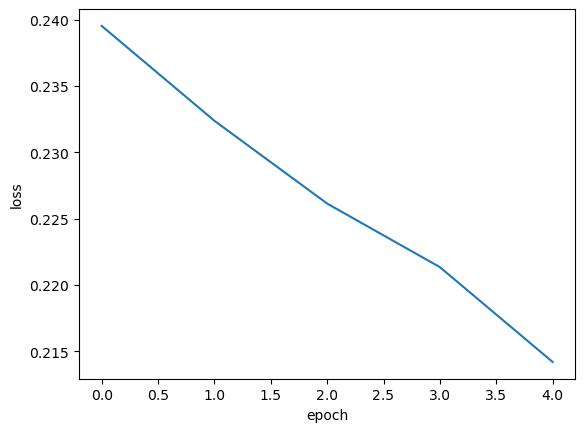

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

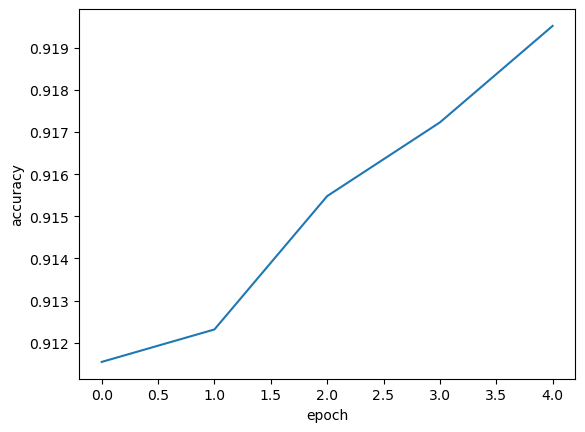

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

**epoch 마다 손실을 감소하고 정확도가 증가함**
- epoch를 늘려볼 필요가 있어보임

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
# 훈련과정을 출력하지 않는대신 저장
history = model.fit(train_scaled, train_target, epochs=20,verbose=0)

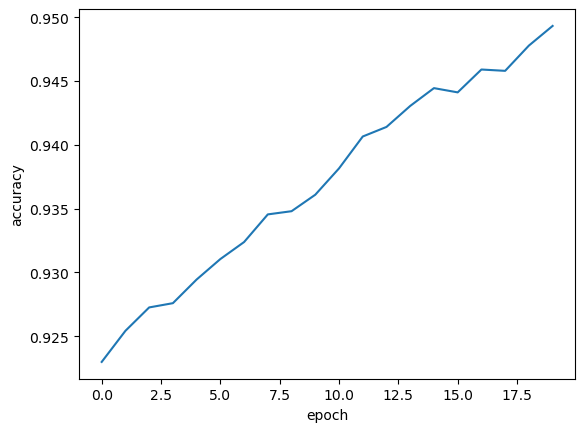

In [15]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

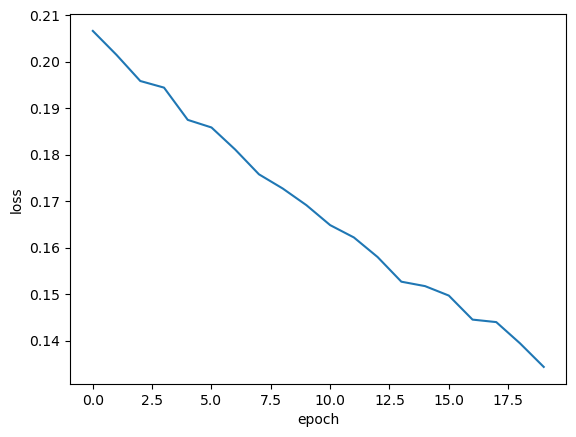

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- epoch를 늘릴수록 손실은 감소하고 정확도는 증가함
    - but, 고려해야 할 상황이 있음. 
    - epoch를 늘린다는건 그만큼 반복학습을 진행한다는 말이므로 과대적합의 가능성을 고려해야 함
        - epoch의 수는 과소/과대 적합과 관련이 있음

## 검증 손실
- 과대/과소 적합을 파악하기 위해 훈련세트에대한 점수 뿐만이 아니라 검증세트에 대한 점수도 필요
- 손실을 이용하여 과대/과소 적합을 확인
- **인공 신경망 모델이 최적화 하는 대상은 정확도가 아니라 손실함수 임**
    - 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있음. 기준을 정확도가 아닌 손실함수에 두고 판단해야 함
    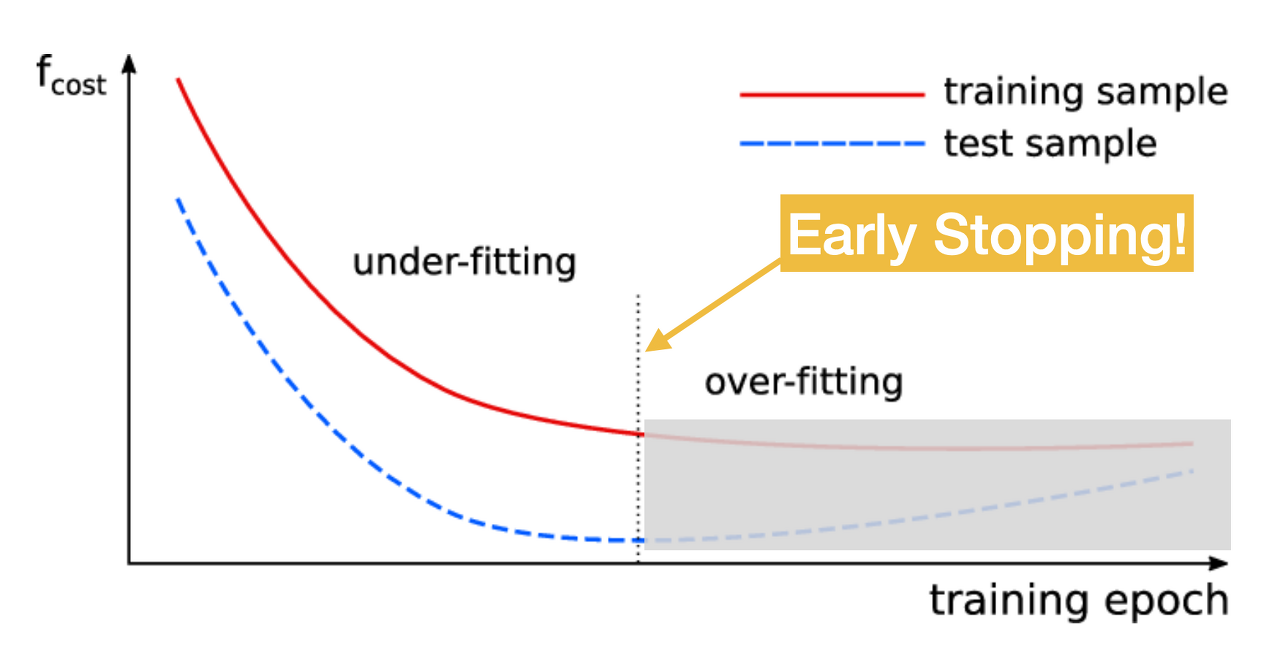
    - 그림 원본: https://c11.kr/r6g5

In [18]:
# 학습시 검증도 같이 진행
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5280 - accuracy: 0.8134 - val_loss: 0.4273 - val_accuracy: 0.8478
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3885 - accuracy: 0.8591 - val_loss: 0.4285 - val_accuracy: 0.8457
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3519 - accuracy: 0.8733 - val_loss: 0.3730 - val_accuracy: 0.8681
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3308 - accuracy: 0.8825 - val_loss: 0.3504 - val_accuracy: 0.8767
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3139 - accuracy: 0.8865 - val_loss: 0.3693 - val_accuracy: 0.8727
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.8915 - val_loss: 0.3675 - val_accuracy: 0.8775
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2950 - accuracy: 0.8961 - val_loss: 0.3891 - val_accuracy:

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

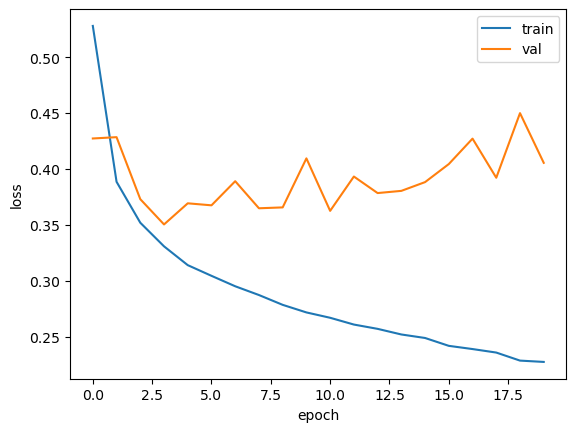

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('t_v.jpg', dpi=300)
plt.show()

- 초기에 검증손실이 감소하다가 3-4 사이에증가 후 7정도에서 한번 더 감소 후 다시 증가세를 보임
    - 실행결과는 달라질 수 있음
- 훈련 손실을 꾸준히 감소하고 있는 중 이기 때문에 전형적인 과대 적합 모형이 일정 epoch 이후 나타남
- 목표는 검증손실이 증가하는 시점을 최대한 뒤로 미루는 것

In [21]:
# 학습시 검증도 같이 진행
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5254 - accuracy: 0.8171 - val_loss: 0.4422 - val_accuracy: 0.8397
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3921 - accuracy: 0.8606 - val_loss: 0.3798 - val_accuracy: 0.8633
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3547 - accuracy: 0.8706 - val_loss: 0.3648 - val_accuracy: 0.8708
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3314 - accuracy: 0.8791 - val_loss: 0.3454 - val_accuracy: 0.8761
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3099 - accuracy: 0.8859 - val_loss: 0.3523 - val_accuracy: 0.8715
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2943 - accuracy: 0.8926 - val_loss: 0.3215 - val_accuracy: 0.8852
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.8950 - val_loss: 0.3195 - val_accuracy:

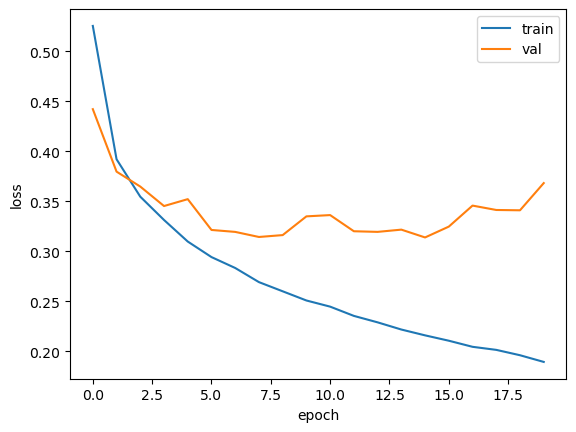

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('t_v.jpg', dpi=300)
plt.show()

- 등락이 있기는 하지만 13-14번째 에포크까지 약간의 손실 감소를 보임

## 드롭아웃

- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 끔(출력을 0으로 만듬)으로써 일반화 시켜 과대적합을 막는 방법
- 샘플들마다 다른(랜덤하게) 뉴런을 끔
- 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있으므로 모든 입력에 주의를 기울이게 됨
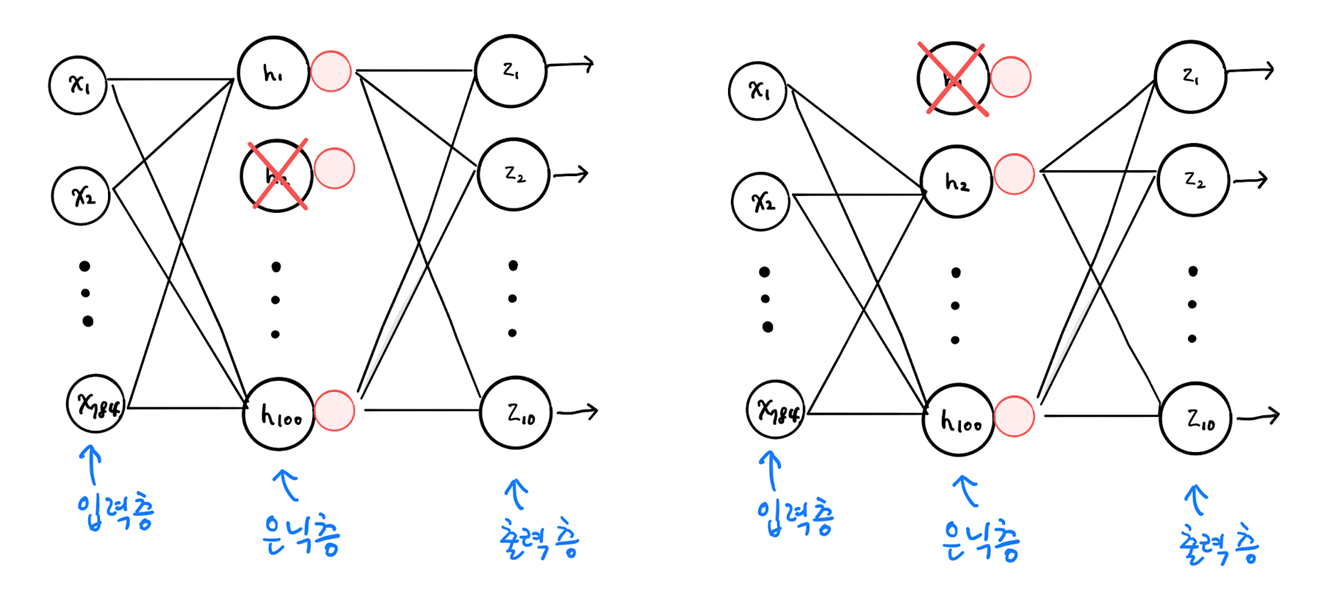

In [24]:
# drop_out층 추가
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 학습시 검증도 같이 진행
# drop_out층 추가
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5162 - accuracy: 0.8192 - val_loss: 0.4238 - val_accuracy: 0.8476
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3860 - accuracy: 0.8623 - val_loss: 0.3776 - val_accuracy: 0.8639
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3468 - accuracy: 0.8740 - val_loss: 0.3518 - val_accuracy: 0.8747
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3234 - accuracy: 0.8819 - val_loss: 0.3441 - val_accuracy: 0.8740
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3011 - accuracy: 0.8885 - val_loss: 0.3487 - val_accuracy: 0.8745
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2868 - accuracy: 0.8949 - val_loss: 0.3280 - val_accuracy: 0.8804
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2752 - accuracy: 0.8981 - val_loss: 0.3133 - val_accuracy:

- 모델의 훈련이 끝나고 예측 평가를 진행할 때는 drop-out을 적용하지 말아야 함
    - 그래야 훈련된 모든 뉴런을 이용해 예측을 진행 할 수 있음
    - 케라스는 예측 평가시(evaluation)에서 drop-out을 자동으로 적용시키지 않는다

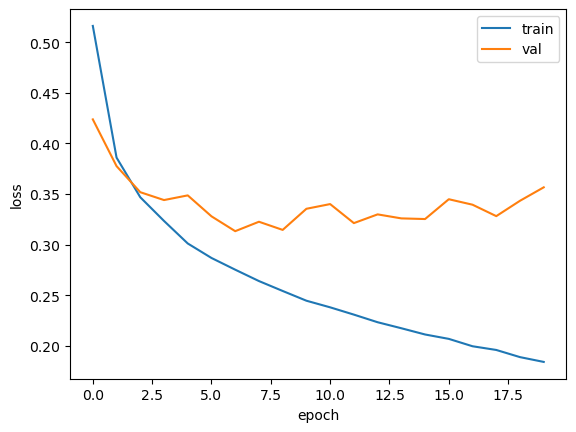

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('t_v.jpg', dpi=300)
plt.show()

- 과대 적합이 확실히 줄었음
    - 10번째 에포트 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느정도 유지됨

## 모델 저장과 복원
- 위 모델은 20번 반복 훈련 했기 때문에 어느정도 과대적합되어 있음
    - 에포크 횟수를 10으로 하고 다시 훈련해볼 필요가 있음

In [27]:
# 학습시 검증도 같이 진행
# drop_out층 추가
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=8,
                    validation_data=(val_scaled, val_target))

Epoch 1/8
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5922 - accuracy: 0.7898 - val_loss: 0.4338 - val_accuracy: 0.8418
Epoch 2/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4430 - accuracy: 0.8415 - val_loss: 0.3866 - val_accuracy: 0.8589
Epoch 3/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4100 - accuracy: 0.8510 - val_loss: 0.3667 - val_accuracy: 0.8675
Epoch 4/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3873 - accuracy: 0.8573 - val_loss: 0.3774 - val_accuracy: 0.8648
Epoch 5/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3724 - accuracy: 0.8628 - val_loss: 0.3543 - val_accuracy: 0.8733
Epoch 6/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3583 - accuracy: 0.8684 - val_loss: 0.3477 - val_accuracy: 0.8728
Epoch 7/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3481 - accuracy: 0.8705 - val_loss: 0.3328 - val_accuracy: 0.8808

- 훈련된 모델의 파라미터를 저장하려면
    - save_weights()함수 사용
    - 파일 확장자에 따라 저장되는 형태가 다름
        - 보통 HDFS 형식으로 저장함
        - HDFS : HaDoop File System

In [28]:
# 훈련된 모델 파라미터 저장
model.save_weights('model_w.h5')

- 파일 저장 확인

#### 저장된 모델 파라미터 이용하여 모델 복원
- load_weight()

In [30]:
# 모델 저장은 훈련된 파라미터를 저장하는 것 이므로
# 모델의 구성은 필요함
model = model_fn(keras.layers.Dropout(0.3))

In [31]:
model.load_weights('model_w.h5')

In [32]:
model.predict(val_scaled)

375/375 [==============================] - 1s 1ms/step


array([[2.67090550e-09, 4.98412143e-14, 1.79754150e-12, ...,
        3.46056959e-06, 9.99992609e-01, 1.73031572e-11],
       [8.72842918e-08, 4.21293940e-13, 2.83564527e-09, ...,
        1.54331339e-10, 9.99999642e-01, 1.81208726e-09],
       [1.26041139e-11, 7.54010786e-13, 5.02359005e-13, ...,
        9.99716222e-01, 1.09031895e-07, 3.16691626e-07],
       ...,
       [2.77756917e-05, 4.18622137e-10, 2.80056867e-07, ...,
        3.69118652e-06, 9.99945521e-01, 6.66054518e-07],
       [3.48962317e-08, 4.79935915e-13, 7.06006711e-11, ...,
        3.80973968e-11, 1.00000000e+00, 1.88047345e-14],
       [3.00132185e-01, 1.19409415e-04, 3.25548574e-02, ...,
        2.92616838e-04, 1.45648053e-04, 5.17680775e-04]], dtype=float32)

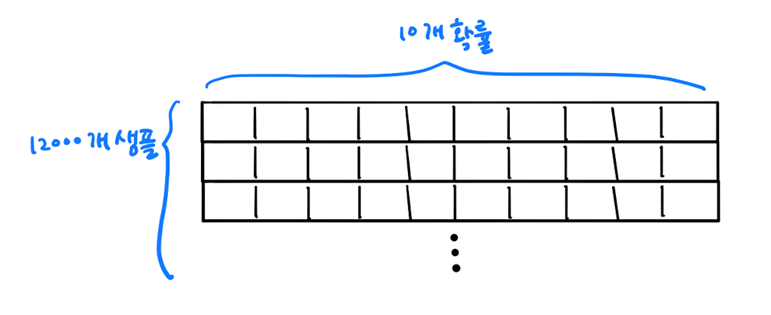
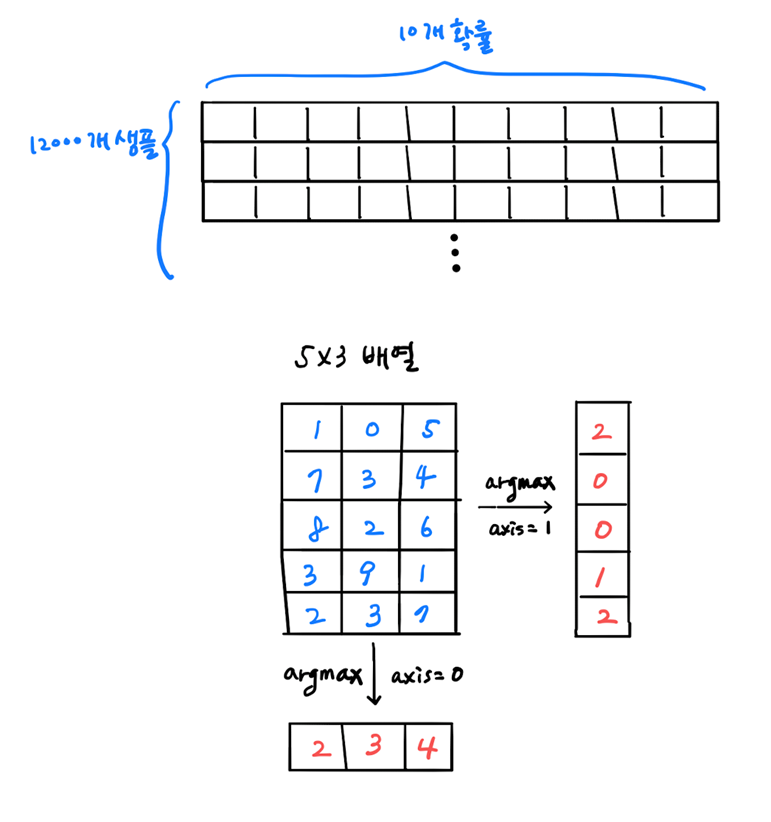

### 저장된 모델을 읽어와서 모델을 이용한 평가

### 결과
- 두 모델은 같은 모델임 : 동일한 모델의 파라미터를 사용하고 있음
    - 정확도의 결과도 동일함

## 콜백
- 위 예제는 20번의 에포크동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인한 후 다시 그 지점까지 다시 훈련하는 방법을 사용함
    - 모델을 다시 훈련하지 않고 한번에 끝내려면????
- 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
    - fit()메서드에 callbacks 매개변수에 리스트로 전달하여 사용
- keras.callbacks.ModelCheckpoint() : 최상의 검증 점수를 낸 모델이 저장(베스트 파라미터 모델과 같은 개념)

- 다시 학습 하지 않기 때문에 훨씬 간편함
    - but, 10번 정도에서 최적의 모델을 찾았음에도 20번까지 학습해야 함
    - 조기종료 사용 훈련 중지
- 조기종료 : 학습을 일찍 중지하여 과대적합을 방지하는 기법

#### early-stopping callback
- 조기종료 콜백
- patience 매개변수를 활용
- ex. patience=2 로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
- restore_best_weights=True 로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
    - 최적 모델에서 몇번 더 훈련을 진행하므로 가중치를 저장하려면 파라미터를 되돌릴 필요가 있음